<a href="https://colab.research.google.com/github/VIHAN-droid/AI-ML-PROJECT/blob/main/SUPERVISED%20LEARNING/LOGISTIC%20REGRESSION/LOR_Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

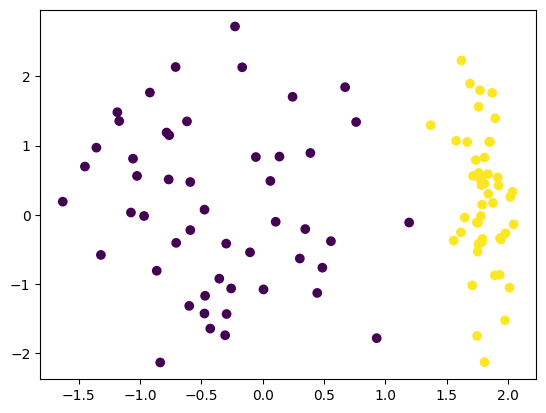

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=5,hypercube=False,class_sep=10)
plt.scatter(x[:,0] , x[:,1] ,c = y)

In [23]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def lor(x,y,learning_rate,epochs):
  x = np.insert(x,0,1,axis=1)
  coeff = np.ones(x.shape[1])

  for _ in range(epochs):
    i = np.random.randint(0,x.shape[0])
    a = sigmoid(np.dot(coeff,x[i]))
    coeff = coeff + learning_rate * (y[i] - a) * x[i]

  return coeff[0] , coeff[1:]

def perceptron(x,y,learning_rate,epochs):
  x = np.insert(x,0,1,axis=1)
  coeff = np.ones(x.shape[1])

  for _ in range(epochs):
    i = np.random.randint(0,x.shape[0])
    a = np.dot(coeff,x[i])
    if a>0:
      a = 1
    else:
      a = 0
    coeff = coeff + learning_rate * (y[i] - a) * x[i]

  return coeff[0] , coeff[1:]

In [26]:
intercept , coefficients = lor(x,y,0.1,1000)
print(intercept , coefficients)
interc , coefs = perceptron(x,y,0.1,1000)

-3.188667286253721 [3.71214492 0.25167301]


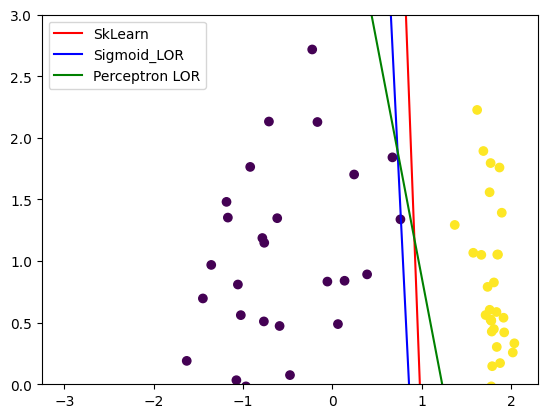

In [27]:
m = - (coefficients[0] / coefficients[1])
c = - (intercept / coefficients[1])

m2 = - (coefs[0] / coefs[1])
c2 = - (interc / coefs[1])

x_plot = np.linspace(-3,2,100)
y_plot = m * x_plot + c
y_plot_perceptron = m2 * x_plot + c2

from sklearn.linear_model import LogisticRegression
lor2 = LogisticRegression()
lor2.fit(x,y)
m = - (lor2.coef_[0][0] / lor2.coef_[0][1])
c = - (lor2.intercept_[0] / lor2.coef_[0][1])
y_plot2 = m * x_plot + c
plt.plot(x_plot,y_plot2,color="red",label="SkLearn")
plt.plot(x_plot,y_plot,color="blue",label="Sigmoid_LOR")
plt.plot(x_plot,y_plot_perceptron,color="green",label="Perceptron LOR")
plt.legend()
plt.ylim(0,3)
plt.scatter(x[:,0],x[:,1],c=y)

In [ ]:
# Sigmoid fn pushes or pulls the line acc to the weights calculated by it